## Teste Técnico - Programa Trainee triggo.ai 2025

This project is divided in 4 parts and each part have it's own particular questions:
- Data cleaning and modelling.
    - Importing the dataset .csv file from Kaggle ("olistbr/brazilian-ecommerce")
    - Data cleaning and normalizing
    - Creation of a relational data modelling
    - Describing each step in the data prep
- Exploratory analysis using SQL and Python
    - Orders volume per month and its seasonality
    - The distribution of orders delivery time
    - The relationship between delivery costs and delivery distance
    - Which are the best-selling products in revenue
    - Brazilian states with the highest average order value
- Solving Business Problems
    - Retention analysis of recurring customers (one or more orders in the analysis period) and which insights could we extract
    - Late delivery prediction analysis:
        - Define what a late delivery is.
        - Use relevant fields to create the features for the model
        - Divide train and test datasets
        - Implement the prediction analisys using Random Forest Classifier
        - Evaluate the model performance and explain the results
    - Customer Segmentation: 
        - Segment the customers in groups
        - Do a behavior analysis  of each group and suggest marketing strategies for each one.
    - Customer Satisfaction: 
        - Explore the relationship between customer review score and other aspects, like product category, delivery time, average order price.
        - Identify the factors that impact the most
- Visualization and Dashboarding
    - MoM Barchart of Orders filtered by Brazil States and Product Category
    - Heatmap of Orders by Region/Brazil States
    - Multiple graphs show the relationship between customer satisfaction and delivery time
    - A dashboard comparing different vendors with best performance in sales, customer satisfaction and delivery time

### Other packages used in this notebook

In [18]:
# %pip install numpy
# %pip install pandas

# %pip install duckdb
# %pip install kagglehub

# %pip install matplotlib
# %pip install seaborn

# %pip install geopy

### Imports

In [19]:
import numpy as np
import pandas as pd
import duckdb
import kagglehub

import matplotlib.pyplot as plt
import seaborn as sns

from geopy import distance 

### Kaggle dataset download

In [20]:
# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Lucas.Batista\.cache\kagglehub\datasets\olistbr\brazilian-ecommerce\versions\2


### Reading the datasets into Pandas DataFrames

Listing all the 9 datasets and describing them:

- olist_customers_dataset.csv
    - Contains information about the customers
    - Raw column names: customer_id, customer_unique_id, customer_zip_code_prefix, customer_city and customer_state
- olist_geolocation_dataset.csv
    - Contains geolocalization information of every geolocation in the dataset
    - Raw column names: geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state
- olist_order_items_dataset.csv
    - Contains information about the customers
    - Raw column names: order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value
- olist_order_payments_dataset.csv
    - Contains information the orders payments
    - Raw column names: order_id, payment_sequential, payment_type, payment_installments, payment_value
- olist_order_reviews_dataset.csv
    - Contains information about the reviews from customers for every order
    - Raw column names: review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timest
- olist_orders_dataset.csv
    - Contains information about orders details
    - Raw column names: order_id,customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date,order_estimated_delivery_date
- olist_products_dataset
    - Contains information about products details
    - Raw column names: product_id, product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
- olist_sellers_dataset
    - Contains information about the sellers
    - Raw column names: seller_id, seller_zip_code_prefix, seller_city, seller_state
- product_category_name_translation
    - Contains name translations, wont be used in this project

![Table Diagram](<Table Diagram.png>)

### Read the olist_customers_dataset.csv into df_customers


In [21]:
dtype = {'customer_zip_code_prefix': 'string'}

df_customers = pd.read_csv(path + "\olist_customers_dataset.csv", dtype=dtype)

df_customers.head()

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Lucas.Batista\AppData\Local\Temp\ipykernel_9188\3343617217.py:3: SyntaxWarning: invalid escape sequence '\o'
  df_customers = pd.read_csv(path + "\olist_customers_dataset.csv", dtype=dtype)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Read the olist_geolocation_dataset.csv into df_geolocation


In [22]:
dtype = {'geolocation_zip_code_prefix': 'string'}

df_geolocation = pd.read_csv(path + "\olist_geolocation_dataset.csv", dtype=dtype)

df_geolocation.head()

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Lucas.Batista\AppData\Local\Temp\ipykernel_9188\34953960.py:3: SyntaxWarning: invalid escape sequence '\o'
  df_geolocation = pd.read_csv(path + "\olist_geolocation_dataset.csv", dtype=dtype)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.545621,-46.639292,sao paulo,SP
1,01046,-23.546081,-46.644820,sao paulo,SP
2,01046,-23.546129,-46.642951,sao paulo,SP
3,01041,-23.544392,-46.639499,sao paulo,SP
4,01035,-23.541578,-46.641607,sao paulo,SP


### Read the olist_order_items_dataset.csv into df_order_items


In [23]:
parse_dates = ['shipping_limit_date']

df_order_items = pd.read_csv(path + "\olist_order_items_dataset.csv", parse_dates=parse_dates)

df_order_items.head()

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Lucas.Batista\AppData\Local\Temp\ipykernel_9188\4211728284.py:3: SyntaxWarning: invalid escape sequence '\o'
  df_order_items = pd.read_csv(path + "\olist_order_items_dataset.csv", parse_dates=parse_dates)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Read the olist_order_payments_dataset.csv to df_order_payments


In [24]:
df_order_payments = pd.read_csv(path + "\olist_order_payments_dataset.csv")

df_order_payments.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Lucas.Batista\AppData\Local\Temp\ipykernel_9188\1292596037.py:1: SyntaxWarning: invalid escape sequence '\o'
  df_order_payments = pd.read_csv(path + "\olist_order_payments_dataset.csv")


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Read the olist_order_reviews_dataset.csv to df_order_reviews


In [25]:
parse_dates = ['review_creation_date', 'review_answer_timestamp']

df_order_reviews = pd.read_csv(path + "\olist_order_reviews_dataset.csv", parse_dates=parse_dates)

df_order_reviews.head()

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Lucas.Batista\AppData\Local\Temp\ipykernel_9188\3058569991.py:3: SyntaxWarning: invalid escape sequence '\o'
  df_order_reviews = pd.read_csv(path + "\olist_order_reviews_dataset.csv", parse_dates=parse_dates)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


### Read the olist_orders_dataset.csv to df_orders


In [26]:
parse_dates = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

df_orders = pd.read_csv(path + "\olist_orders_dataset.csv", parse_dates=parse_dates)

df_orders.head()

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Lucas.Batista\AppData\Local\Temp\ipykernel_9188\2499727381.py:3: SyntaxWarning: invalid escape sequence '\o'
  df_orders = pd.read_csv(path + "\olist_orders_dataset.csv", parse_dates=parse_dates)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


### Read the olist_products_dataset.csv to df_products


In [27]:
df_products = pd.read_csv(path + "\olist_products_dataset.csv")

df_products.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Lucas.Batista\AppData\Local\Temp\ipykernel_9188\832530910.py:1: SyntaxWarning: invalid escape sequence '\o'
  df_products = pd.read_csv(path + "\olist_products_dataset.csv")


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Read the olist_sellers_dataset.csv to df_sellers


In [28]:
dtype = {'seller_zip_code_prefix': 'string'}

df_sellers = pd.read_csv(path + "\olist_sellers_dataset.csv", dtype=dtype)

df_sellers.head()

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Lucas.Batista\AppData\Local\Temp\ipykernel_9188\299301410.py:3: SyntaxWarning: invalid escape sequence '\o'
  df_sellers = pd.read_csv(path + "\olist_sellers_dataset.csv", dtype=dtype)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,04195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Orders volume per month and its seasonality

Here I used datetrunc to get the months of every date, then format with strftime, to get only a Month date. If datepart was used it would return an Integer instead of a String, so I prefer this way.

In [29]:
orders_per_month = duckdb.query(
                                    "SELECT \
                                        strftime(datetrunc('month', order_purchase_timestamp), '%m') AS month, \
                                        COUNT( order_id) AS count_orders \
                                    FROM df_orders \
                                    GROUP BY month \
                                    ORDER BY month"

                                ).df()

orders_per_month

,month,count_orders
0,01,8069
1,02,8508
2,03,9893
3,04,9343
4,05,10573
5,06,9412
6,07,10318
7,08,10843
8,09,4305
9,10,4959


### Months of August, May and July were the top 3 orders per months

Im using iloc to get the first and second columns

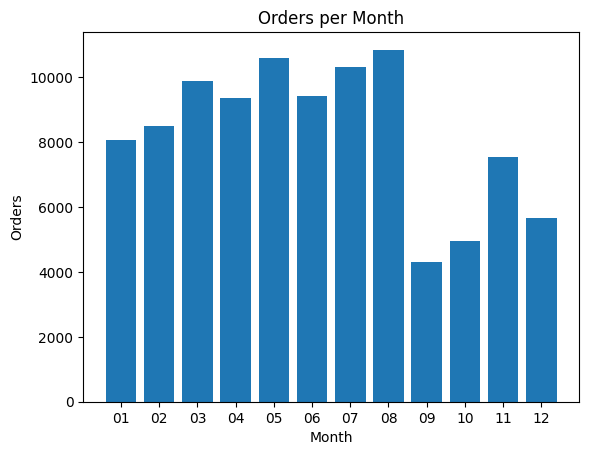

In [30]:
month = orders_per_month.iloc[:, 0]
count_orders = orders_per_month.iloc[:, 1]

plt.bar(month, count_orders)
plt.title('Orders per Month')
plt.xlabel('Month')
plt.ylabel('Orders')
plt.show()


### The Distribution of orders delivery time

To calculate the delivery time, Im using the order_delivered_customer_date as delivery time and the order_approved_at when the timer to the order be shipped

Calculating the mode of the dataset, to get the most frequent day to delivery

Selection only orders with the order_status = delivered

In [31]:
order_delivery_time = duckdb.query(
                                    "SELECT\
                                        order_id, \
                                        datediff('day', order_approved_at, order_delivered_customer_date) AS day_to_delivery \
                                    FROM df_orders \
                                    WHERE order_status = 'delivered'"

                                ).df()

print('Mode: ', order_delivery_time.day_to_delivery.mode())

Mode:  0    7
Name: day_to_delivery, dtype: Int64


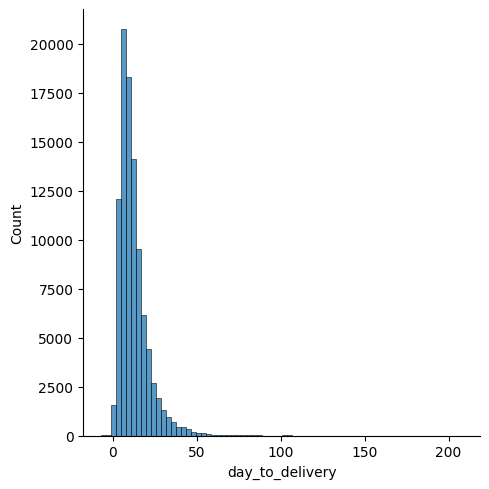

In [32]:
sns.displot(order_delivery_time, x="day_to_delivery", binwidth=3)

### SQL JOINs to get the right data from the multiple tables

- Starting with Customer table joining Geolocation table, to get the latitute and longitude from each customer
- As latitude and Longitude coulh have multiple values for each zip code, I decided to use the AVG function to get an average of each location
- Then joining Customer table with Orders table to get the order_id

In [33]:
customer_geo = duckdb.query(
"""
  SELECT
    c.customer_id,
    c.customer_zip_code_prefix,
    c.customer_city,
    c.customer_state,
    o.order_id,
    o.order_approved_at,
    o.order_delivered_customer_date,
    o.order_estimated_delivery_date,
    AVG(g.geolocation_lat) AS customer_lat,
    AVG(g.geolocation_lng) AS customer_lng
  FROM
    df_customers AS c
  INNER JOIN
    df_geolocation AS g
      ON c.customer_zip_code_prefix = g.geolocation_zip_code_prefix
      AND c.customer_city = g.geolocation_city
      AND c.customer_state = g.geolocation_state
  INNER JOIN 
    df_orders AS o
      ON c.customer_id = o.customer_id
      AND order_status = 'delivered'
  GROUP BY
    1,2,3,4,5,6,7,8
"""
).df()

customer_geo.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,customer_lat,customer_lng
0,8c3ef80af590b71396ade3b7a82484f5,04774,sao paulo,SP,c4f3b6a5e1b0cd332ac54136c94c5053,2017-03-28 23:22:42,2017-04-03 08:17:52,2017-04-24,-23.684583,-46.706971
1,a33aa4395098f8b30755738b398ece95,04777,sao paulo,SP,0b2a26edc4451c98cc27d3bcb28d8766,2017-06-06 22:35:25,2017-06-13 12:27:46,2017-06-20,-23.695008,-46.698097
2,7a74aa94eccd47b6c280dd22bdfaa5d2,04763,sao paulo,SP,3928ee08774d7c7850f58871b25ce3ec,2018-08-22 21:05:13,2018-08-27 14:06:46,2018-09-14,-23.669689,-46.718768
3,ba0660bf3fffe505ee892e153a2fbd49,04753,sao paulo,SP,4df92d82d79c3b52c7138679fa9b07fc,2018-07-29 23:30:52,2018-07-27 18:55:57,2018-08-06,-23.654136,-46.713723
4,226f45581c1b5fe6ab7ac0d9e060a2c4,04747,sao paulo,SP,27bef9e280946001761b32ae6463dbe0,2017-08-10 15:43:42,2017-08-14 20:47:41,2017-08-23,-23.656762,-46.697987


Joining the customer_geo table with df_order_items, to get some metrics and to join with df_products, to get products metrics, for usage in the freight calculation 

In [63]:

order_products = duckdb.query(
"""
  SELECT
    cg.customer_id,
    cg.customer_zip_code_prefix,
    cg.customer_city,
    cg.customer_state,
    cg.customer_lat,
    cg.customer_lng,
    cg.order_id,
    cg.order_approved_at,
    cg.order_delivered_customer_date,
    cg.order_estimated_delivery_date, 
    oi.seller_id,
    oi.product_id,
    oi.price,
    oi.freight_value,
    p.product_category_name
  FROM 
    customer_geo AS cg
  INNER JOIN   
    df_order_items AS oi
      ON cg.order_id = oi.order_id
  INNER JOIN   
    df_products AS p
      ON oi.product_id = p.product_id
"""
).df()

order_products

,customer_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,order_id,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,seller_id,product_id,price,freight_value,product_category_name
0,8c3ef80af590b71396ade3b7a82484f5,04774,sao paulo,SP,-23.684583,-46.706971,c4f3b6a5e1b0cd332ac54136c94c5053,2017-03-28 23:22:42,2017-04-03 08:17:52,2017-04-24,001cca7ae9ae17fb1caed9dfb1094831,e251ebd2858be1aa7d9b2087a6992580,139.90,16.68,ferramentas_jardim
1,a33aa4395098f8b30755738b398ece95,04777,sao paulo,SP,-23.695008,-46.698097,0b2a26edc4451c98cc27d3bcb28d8766,2017-06-06 22:35:25,2017-06-13 12:27:46,2017-06-20,e9779976487b77c6d4ac45f75ec7afe9,72172e982e8b92155069e4201c92c0bb,27.55,8.27,esporte_lazer
2,7a74aa94eccd47b6c280dd22bdfaa5d2,04763,sao paulo,SP,-23.669689,-46.718768,3928ee08774d7c7850f58871b25ce3ec,2018-08-22 21:05:13,2018-08-27 14:06:46,2018-09-14,fa1a9dec3a9940c072684a46728bf1fc,a671b5c0b737258c5a3262826e3dd9c5,137.90,23.77,pet_shop
3,ba0660bf3fffe505ee892e153a2fbd49,04753,sao paulo,SP,-23.654136,-46.713723,4df92d82d79c3b52c7138679fa9b07fc,2018-07-29 23:30:52,2018-07-27 18:55:57,2018-08-06,1025f0e2d44d7041d6cf58b6550e0bfa,de533fe5b9448ea9792195806938dbf5,196.80,12.40,moveis_decoracao
4,226f45581c1b5fe6ab7ac0d9e060a2c4,04747,sao paulo,SP,-23.656762,-46.697987,27bef9e280946001761b32ae6463dbe0,2017-08-10 15:43:42,2017-08-14 20:47:41,2017-08-23,3504c0cb71d7fa48d967e0e4c94d59d9,a2e23998b013d26d049d721aa7a32e1b,24.99,7.78,moveis_decoracao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109860,f22449ebc3dcc171a096c27de4c3a901,23900,angra dos reis,RJ,-23.007751,-44.316366,5448a97fc343f6f23807effd01938241,2018-03-02 02:11:00,2018-04-12 00:05:00,2018-04-06,7c67e1448b00f6e969d365cea6b010ab,b114bf337c0626166abe574eee9e3f32,149.94,25.36,moveis_escritorio
109861,3008cf4a74a01457bd6c1a13dd303150,23914,angra dos reis,RJ,-22.993718,-44.237848,6d6491e68b2e416f68ec6e23e004d3a3,2017-10-24 20:49:53,2017-11-01 16:27:23,2017-11-10,98dac6635aee4995d501a3972e047414,13a58c8c026b664e412003b4cbdc30a3,9.60,16.11,utilidades_domesticas
109862,6c9fa2988ebdbc1b1af97d9f21e7ad37,26255,nova iguacu,RJ,-22.760870,-43.456664,87d65accbbf482b8a87bd13bb444cf6d,2018-03-08 02:50:29,2018-03-14 21:28:46,2018-03-26,2a261b5b644fa05f4f2700eb93544f2c,a3daee3915d4fb98376e039ede6bdea6,50.00,22.93,moveis_decoracao
109863,99a32bf8f0c54702217b584a4d220761,21060,rio de janeiro,RJ,-22.857332,-43.263640,cc460ac4435835dfdda5526dfe84f01f,2017-04-27 10:32:44,2017-04-27 22:23:09,2017-05-12,ddd51ae8cda92f3995a51fc0f0f3eec7,200eed7d1d3482898094819dbec1cb52,36.90,24.85,utilidades_domesticas


- Joining the seller_df and the geolocation_df to get the seller localization
- Again, using the AVG function to get an average of each zip_code

In [64]:

seller_geo = duckdb.query(
"""
  SELECT
    s.seller_id,
    s.seller_zip_code_prefix,
    s.seller_city,
    s.seller_state,
    AVG(g.geolocation_lat) AS seller_lat,
    AVG(g.geolocation_lng) AS seller_lng
  FROM
    df_sellers AS s
  INNER JOIN
    df_geolocation AS g
      ON s.seller_zip_code_prefix = g.geolocation_zip_code_prefix
      AND s.seller_city = g.geolocation_city
      AND s.seller_state = g.geolocation_state
  GROUP BY
    1,2,3,4
"""
).df()

seller_geo.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
0,b83cedfb587e7911540e3f576d6917ce,04870,sao paulo,SP,-23.760640,-46.753784
1,9b522ba7eae9e1d04082f267144583cc,04843,sao paulo,SP,-23.742992,-46.694480
2,2e1c9f22be269ef4643f826c9e650a52,04850,sao paulo,SP,-23.747138,-46.682674
3,98e164d549402270247f3c96a1a158ef,05083,sao paulo,SP,-23.532953,-46.716831
4,a2deecd5398f5df4987110c80a1972a3,05043,sao paulo,SP,-23.525668,-46.691655


- Joining the order_products with the seller_geo df to get the sellers data
- Joining order_products with the df_order_reviews, and get the review score
- Use the coalesce function to give a 0 to the review_score in case it was NULL (the customer didnt review)

In [67]:
master_table = duckdb.query(
"""
  SELECT
    op.order_id,
    coalesce(r.review_score,0) AS review_score,
    order_approved_at,
    order_delivered_customer_date,
    order_estimated_delivery_date, 

    product_id,
    price,
    freight_value,
    product_category_name,

    customer_id,
    customer_zip_code_prefix,
    customer_city,
    customer_state,
    customer_lat,
    customer_lng,

    s.seller_id,
    s.seller_zip_code_prefix,
    s.seller_city,
    s.seller_state,
    seller_lat,
    seller_lng
  FROM
    order_products AS op
  INNER JOIN
    seller_geo AS s
      ON op.seller_id = s.seller_id
  LEFT JOIN
    df_order_reviews AS r
      ON op.order_id = r.order_id
"""
).df()

master_table

,order_id,review_score,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,product_id,price,freight_value,product_category_name,customer_id,...,customer_city,customer_state,customer_lat,customer_lng,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
0,77f479e3e239f3478fe743b319837eb5,5,2018-02-01 03:11:37,2018-02-22 20:34:41,2018-03-05,f62cbf4416c9ef8e1b4e8d5279891f24,13.65,15.10,eletronicos,a96c2c3cfaba640c3c396da506e3d8af,...,carazinho,RS,-28.291245,-52.790256,8b321bb669392f5163d04c59e235e066,01212,sao paulo,SP,-23.538663,-46.639925
1,49b25de91ca7ebe3b4b740b332b5e0a0,4,2018-02-03 23:31:46,2018-02-23 21:09:56,2018-03-02,e8d6e49fb0a39cfd4ebcdb977ebb82c4,19.90,16.11,construcao_ferramentas_seguranca,00bd25230af840df218e6902df6ac894,...,erechim,RS,-27.636046,-52.273049,b2a6d334e2833acea353624840e25a0e,04133,sao paulo,SP,-23.621590,-46.618487
2,f1b7d59f950404a6f520298601daac7f,3,2017-08-11 13:05:08,2017-09-08 11:00:11,2017-09-12,eab67bf937aaadc19f83383a331d2dd9,159.99,38.96,moveis_escritorio,842d0a578fc9965acb84ea548c9f1a64,...,carazinho,RS,-28.291245,-52.790256,7c67e1448b00f6e969d365cea6b010ab,08577,itaquaquecetuba,SP,-23.486111,-46.366721
3,4ccfa0c7ce3c1a6069ae72d9596c4d6e,5,2018-07-21 16:35:12,2018-07-30 15:58:33,2018-08-09,81d2fa5b1805af5f9e0d08af321b2f35,149.65,22.98,beleza_saude,433213c150052114940ca5cea0eae794,...,erechim,RS,-27.636046,-52.273049,edb1ef5e36e0c8cd84eb3c9b003e486d,25957,teresopolis,RJ,-22.430586,-42.970082
4,de0a003330b41a595051ce9986bc7799,5,2018-05-16 20:16:26,2018-05-21 15:11:48,2018-06-01,45f7c48e7ead07eb1afd9aebfe6de326,279.97,19.79,utilidades_domesticas,8e1026d431a055944bb4b806ae45ce7c,...,tapejara,RS,-28.068959,-52.012068,33a17d60c64393351ebf1ef860f4e0f2,91510,porto alegre,RS,-30.071335,-51.177751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107488,37e5725572d3cbd7aad103b730f9232a,0,2018-08-20 14:53:41,2018-08-29 22:58:53,2018-08-27,203086d8efe5991e11ed8f673bd18d64,47.33,9.08,papelaria,3dd789d5301761182d28eb73ce1558ed,...,sao paulo,SP,-23.498178,-46.637802,95ec4458365c4d11f452ccf538377619,13481,limeira,SP,-22.600004,-47.407129
107489,5e7ac1d3afa3583411b284bebd5dcdcb,0,2017-07-25 09:45:14,2017-08-15 17:42:19,2017-08-22,461f43be3bdf8844e65b62d9ac2c7a5a,157.99,15.86,relogios_presentes,d503771c01369a24b04e6151ca9882cc,...,rio grande,RS,-32.034647,-52.097202,4869f7a5dfa277a7dca6462dcf3b52b2,14840,guariba,SP,-21.363502,-48.229601
107490,b8d77039678b54ada97e6420b3272850,0,2018-02-23 13:50:30,2018-02-25 13:58:30,2018-03-09,dfec64aac9b864b2807a7be33222b75f,84.90,9.41,cama_mesa_banho,841e56fbee6e9b955edee71e568cedc1,...,sao paulo,SP,-23.559910,-46.586207,1e8b33f18b4f7598d87f5cbee2282cc2,02066,sao paulo,SP,-23.508732,-46.605334
107491,0c6036de51fa390a9f4491643bfcf4df,0,2017-02-15 09:45:10,2017-02-21 17:46:20,2017-03-16,9cfb6da38dab3ad1f5e8cf3189ab6ae1,74.90,11.91,moveis_decoracao,30d9367a01aa566cd76f62e91cdd40c7,...,sao paulo,SP,-23.468292,-46.633236,cca3071e3e9bb7d12640c9fbe2301306,14940,ibitinga,SP,-21.757321,-48.829744


In [70]:
delivery_costs = duckdb.query(
"""
  SELECT
    order_id,

    product_id,
    freight_value,    
    product_category_name,

    customer_id,
    customer_zip_code_prefix,
    customer_lat,
    customer_lng,

    seller_id,
    seller_zip_code_prefix,
    seller_lat,
    seller_lng
  FROM
    master_table 
"""
).df()

delivery_costs

,order_id,product_id,freight_value,product_category_name,customer_id,customer_zip_code_prefix,customer_lat,customer_lng,seller_id,seller_zip_code_prefix,seller_lat,seller_lng
0,77f479e3e239f3478fe743b319837eb5,f62cbf4416c9ef8e1b4e8d5279891f24,15.10,eletronicos,a96c2c3cfaba640c3c396da506e3d8af,99500,-28.291245,-52.790256,8b321bb669392f5163d04c59e235e066,01212,-23.538663,-46.639925
1,49b25de91ca7ebe3b4b740b332b5e0a0,e8d6e49fb0a39cfd4ebcdb977ebb82c4,16.11,construcao_ferramentas_seguranca,00bd25230af840df218e6902df6ac894,99700,-27.636046,-52.273049,b2a6d334e2833acea353624840e25a0e,04133,-23.621590,-46.618487
2,f1b7d59f950404a6f520298601daac7f,eab67bf937aaadc19f83383a331d2dd9,38.96,moveis_escritorio,842d0a578fc9965acb84ea548c9f1a64,99500,-28.291245,-52.790256,7c67e1448b00f6e969d365cea6b010ab,08577,-23.486111,-46.366721
3,4ccfa0c7ce3c1a6069ae72d9596c4d6e,81d2fa5b1805af5f9e0d08af321b2f35,22.98,beleza_saude,433213c150052114940ca5cea0eae794,99700,-27.636046,-52.273049,edb1ef5e36e0c8cd84eb3c9b003e486d,25957,-22.430586,-42.970082
4,de0a003330b41a595051ce9986bc7799,45f7c48e7ead07eb1afd9aebfe6de326,19.79,utilidades_domesticas,8e1026d431a055944bb4b806ae45ce7c,99950,-28.068959,-52.012068,33a17d60c64393351ebf1ef860f4e0f2,91510,-30.071335,-51.177751
...,...,...,...,...,...,...,...,...,...,...,...,...
107488,37e5725572d3cbd7aad103b730f9232a,203086d8efe5991e11ed8f673bd18d64,9.08,papelaria,3dd789d5301761182d28eb73ce1558ed,02450,-23.498178,-46.637802,95ec4458365c4d11f452ccf538377619,13481,-22.600004,-47.407129
107489,5e7ac1d3afa3583411b284bebd5dcdcb,461f43be3bdf8844e65b62d9ac2c7a5a,15.86,relogios_presentes,d503771c01369a24b04e6151ca9882cc,96200,-32.034647,-52.097202,4869f7a5dfa277a7dca6462dcf3b52b2,14840,-21.363502,-48.229601
107490,b8d77039678b54ada97e6420b3272850,dfec64aac9b864b2807a7be33222b75f,9.41,cama_mesa_banho,841e56fbee6e9b955edee71e568cedc1,03165,-23.559910,-46.586207,1e8b33f18b4f7598d87f5cbee2282cc2,02066,-23.508732,-46.605334
107491,0c6036de51fa390a9f4491643bfcf4df,9cfb6da38dab3ad1f5e8cf3189ab6ae1,11.91,moveis_decoracao,30d9367a01aa566cd76f62e91cdd40c7,02423,-23.468292,-46.633236,cca3071e3e9bb7d12640c9fbe2301306,14940,-21.757321,-48.829744


### Using the lib GeoPY its possible to calculate the distance between two point using the latitude and longitude

In [71]:
def calculate_distance(row):
    customer_location = (row['customer_lat'], row['customer_lng'])
    seller_location = (row['seller_lat'], row['seller_lng'])
    return distance.distance(customer_location, seller_location).km


delivery_costs['delivery_distance'] = delivery_costs.apply(calculate_distance, axis=1)

delivery_costs

,order_id,product_id,freight_value,product_category_name,customer_id,customer_zip_code_prefix,customer_lat,customer_lng,seller_id,seller_zip_code_prefix,seller_lat,seller_lng,delivery_distance
0,77f479e3e239f3478fe743b319837eb5,f62cbf4416c9ef8e1b4e8d5279891f24,15.10,eletronicos,a96c2c3cfaba640c3c396da506e3d8af,99500,-28.291245,-52.790256,8b321bb669392f5163d04c59e235e066,01212,-23.538663,-46.639925,810.240016
1,49b25de91ca7ebe3b4b740b332b5e0a0,e8d6e49fb0a39cfd4ebcdb977ebb82c4,16.11,construcao_ferramentas_seguranca,00bd25230af840df218e6902df6ac894,99700,-27.636046,-52.273049,b2a6d334e2833acea353624840e25a0e,04133,-23.621590,-46.618487,721.118984
2,f1b7d59f950404a6f520298601daac7f,eab67bf937aaadc19f83383a331d2dd9,38.96,moveis_escritorio,842d0a578fc9965acb84ea548c9f1a64,99500,-28.291245,-52.790256,7c67e1448b00f6e969d365cea6b010ab,08577,-23.486111,-46.366721,835.022345
3,4ccfa0c7ce3c1a6069ae72d9596c4d6e,81d2fa5b1805af5f9e0d08af321b2f35,22.98,beleza_saude,433213c150052114940ca5cea0eae794,99700,-27.636046,-52.273049,edb1ef5e36e0c8cd84eb3c9b003e486d,25957,-22.430586,-42.970082,1101.203910
4,de0a003330b41a595051ce9986bc7799,45f7c48e7ead07eb1afd9aebfe6de326,19.79,utilidades_domesticas,8e1026d431a055944bb4b806ae45ce7c,99950,-28.068959,-52.012068,33a17d60c64393351ebf1ef860f4e0f2,91510,-30.071335,-51.177751,236.336204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107488,37e5725572d3cbd7aad103b730f9232a,203086d8efe5991e11ed8f673bd18d64,9.08,papelaria,3dd789d5301761182d28eb73ce1558ed,02450,-23.498178,-46.637802,95ec4458365c4d11f452ccf538377619,13481,-22.600004,-47.407129,126.925869
107489,5e7ac1d3afa3583411b284bebd5dcdcb,461f43be3bdf8844e65b62d9ac2c7a5a,15.86,relogios_presentes,d503771c01369a24b04e6151ca9882cc,96200,-32.034647,-52.097202,4869f7a5dfa277a7dca6462dcf3b52b2,14840,-21.363502,-48.229601,1243.132930
107490,b8d77039678b54ada97e6420b3272850,dfec64aac9b864b2807a7be33222b75f,9.41,cama_mesa_banho,841e56fbee6e9b955edee71e568cedc1,03165,-23.559910,-46.586207,1e8b33f18b4f7598d87f5cbee2282cc2,02066,-23.508732,-46.605334,5.995196
107491,0c6036de51fa390a9f4491643bfcf4df,9cfb6da38dab3ad1f5e8cf3189ab6ae1,11.91,moveis_decoracao,30d9367a01aa566cd76f62e91cdd40c7,02423,-23.468292,-46.633236,cca3071e3e9bb7d12640c9fbe2301306,14940,-21.757321,-48.829744,294.772930


### Calculating the relationship between freigth cost and distance

In [72]:
cents_per_km = duckdb.query(
"""
  SELECT
    order_id,
    product_id,
    product_category_name,
    freight_value,
    delivery_distance,
    freight_value / delivery_distance AS price_per_km  
  FROM
    delivery_costs 
"""
).df()

cents_per_km

,order_id,product_id,product_category_name,freight_value,delivery_distance,price_per_km
0,77f479e3e239f3478fe743b319837eb5,f62cbf4416c9ef8e1b4e8d5279891f24,eletronicos,15.10,810.240016,0.018636
1,49b25de91ca7ebe3b4b740b332b5e0a0,e8d6e49fb0a39cfd4ebcdb977ebb82c4,construcao_ferramentas_seguranca,16.11,721.118984,0.022340
2,f1b7d59f950404a6f520298601daac7f,eab67bf937aaadc19f83383a331d2dd9,moveis_escritorio,38.96,835.022345,0.046657
3,4ccfa0c7ce3c1a6069ae72d9596c4d6e,81d2fa5b1805af5f9e0d08af321b2f35,beleza_saude,22.98,1101.203910,0.020868
4,de0a003330b41a595051ce9986bc7799,45f7c48e7ead07eb1afd9aebfe6de326,utilidades_domesticas,19.79,236.336204,0.083737
...,...,...,...,...,...,...
107488,37e5725572d3cbd7aad103b730f9232a,203086d8efe5991e11ed8f673bd18d64,papelaria,9.08,126.925869,0.071538
107489,5e7ac1d3afa3583411b284bebd5dcdcb,461f43be3bdf8844e65b62d9ac2c7a5a,relogios_presentes,15.86,1243.132930,0.012758
107490,b8d77039678b54ada97e6420b3272850,dfec64aac9b864b2807a7be33222b75f,cama_mesa_banho,9.41,5.995196,1.569590
107491,0c6036de51fa390a9f4491643bfcf4df,9cfb6da38dab3ad1f5e8cf3189ab6ae1,moveis_decoracao,11.91,294.772930,0.040404


In [73]:
cents_per_km = duckdb.query(
"""
    SELECT
        order_id,
        product_id,
        product_category_name,
        freight_value,
        CASE WHEN delivery_distance < 1 THEN 1 ELSE delivery_distancE END AS delivery_distance,
        freight_value / (CASE WHEN delivery_distance < 1 THEN 1 ELSE delivery_distance END) AS price_per_km  
    FROM
        delivery_costs
"""
).df()

cents_per_km

,order_id,product_id,product_category_name,freight_value,delivery_distance,price_per_km
0,77f479e3e239f3478fe743b319837eb5,f62cbf4416c9ef8e1b4e8d5279891f24,eletronicos,15.10,810.240016,0.018636
1,49b25de91ca7ebe3b4b740b332b5e0a0,e8d6e49fb0a39cfd4ebcdb977ebb82c4,construcao_ferramentas_seguranca,16.11,721.118984,0.022340
2,f1b7d59f950404a6f520298601daac7f,eab67bf937aaadc19f83383a331d2dd9,moveis_escritorio,38.96,835.022345,0.046657
3,4ccfa0c7ce3c1a6069ae72d9596c4d6e,81d2fa5b1805af5f9e0d08af321b2f35,beleza_saude,22.98,1101.203910,0.020868
4,de0a003330b41a595051ce9986bc7799,45f7c48e7ead07eb1afd9aebfe6de326,utilidades_domesticas,19.79,236.336204,0.083737
...,...,...,...,...,...,...
107488,37e5725572d3cbd7aad103b730f9232a,203086d8efe5991e11ed8f673bd18d64,papelaria,9.08,126.925869,0.071538
107489,5e7ac1d3afa3583411b284bebd5dcdcb,461f43be3bdf8844e65b62d9ac2c7a5a,relogios_presentes,15.86,1243.132930,0.012758
107490,b8d77039678b54ada97e6420b3272850,dfec64aac9b864b2807a7be33222b75f,cama_mesa_banho,9.41,5.995196,1.569590
107491,0c6036de51fa390a9f4491643bfcf4df,9cfb6da38dab3ad1f5e8cf3189ab6ae1,moveis_decoracao,11.91,294.772930,0.040404


### Analysis of the Freight values

Grouped by Product Category with its minimum, maximum and the average

In [74]:
freight_analysis = duckdb.query(
"""
    SELECT
        product_category_name,
        MIN(price_per_km) AS min_price_per_km,
        MAX(price_per_km) AS max_price_per_km,
        AVG(price_per_km) AS avg_price_per_km
    FROM
        cents_per_km
    GROUP BY
        1
"""
).df()

freight_analysis

,product_category_name,min_price_per_km,max_price_per_km,avg_price_per_km
0,telefonia,0.000101,7.780000,0.147368
1,utilidades_domesticas,0.000032,41.000000,0.220119
2,beleza_saude,0.000000,52.362101,0.173171
3,informatica_acessorios,0.000098,15.550000,0.121016
4,pet_shop,0.000021,7.780000,0.153196
...,...,...,...,...
69,climatizacao,0.010156,19.526082,0.266569
70,construcao_ferramentas_jardim,0.006489,5.147430,0.115260
71,telefonia_fixa,0.007492,2.166991,0.122932
72,moveis_cozinha_area_de_servico_jantar_e_jardim,0.010769,10.810311,0.479971


### Best Selling Products Categories

In [77]:
best_selling_products = duckdb.query(
"""
    SELECT
        product_category_name,
        COUNT(product_category_name) AS count_products,
        SUM(price) AS sum_price
    FROM
        master_table
    GROUP BY
        1
    ORDER BY 
        3 DESC
"""
).df()

best_selling_products

,product_category_name,count_products,sum_price
0,beleza_saude,9285,1215949.50
1,relogios_presentes,5837,1158718.40
2,cama_mesa_banho,10978,1029541.58
3,esporte_lazer,8047,892674.73
4,informatica_acessorios,7546,868288.40
...,...,...,...
69,flores,33,1110.04
70,casa_conforto_2,30,760.27
71,cds_dvds_musicais,14,730.00
72,fashion_roupa_infanto_juvenil,7,519.95


### Which Brazilian States have the highest average order price 

In [80]:
highest_average_orders = duckdb.query(
"""
    SELECT
        customer_state,
        COUNT(product_category_name) AS count_products,
        AVG(price) AS avg_price
    FROM
        master_table
    GROUP BY
        1
    ORDER BY 
        3 DESC
"""
).df()

highest_average_orders

,customer_state,count_products,avg_price
0,PB,562,185.324939
1,AL,417,185.296841
2,AC,85,166.883103
3,AP,80,165.936375
4,PA,1016,160.392708
5,RO,255,158.831192
6,PI,500,155.953294
7,RN,504,155.403431
8,CE,1366,152.483234
9,SE,361,151.040028
